In [1]:
#Importing torch library
import torch 
from torch import nn

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import torchvision and essential functions from torchvision
import torchvision
from torchvision import transforms
from torchvision import models,datasets

In [4]:
from torch.utils.data import DataLoader,Dataset

In [5]:
#Importing Image from PIL library
from PIL import Image

In [6]:
#Importing essential libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix
import copy

# Understanding Data

In [7]:
#Picking a random image from _data_setup/cell_images/train/infected/ to understand the data
train_img_infected = Image.open('_data_setup/cell_images/train/infected/C59P20thinF_IMG_20150803_113430_cell_37.png')

In [8]:
#Coverting the image into an array
train_img_infected = np.array(train_img_infected)

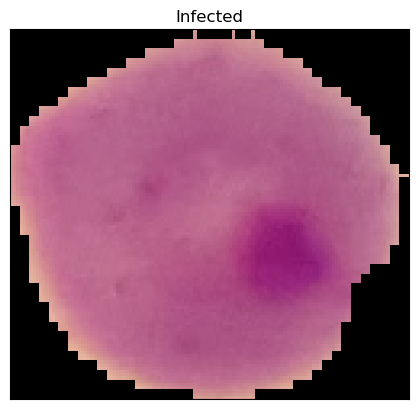

In [9]:
#Plotting and saving the image
plt.imshow(train_img_infected)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title("Infected")
#plt.savefig('_plots/infected.jpeg')
plt.show()

In [10]:
#Picking a random image from _data_setup/cell_images/train/uninfected/ to understand the data
train_img_uninfected = Image.open('_data_setup/cell_images/train/uninfected/C37BP2_thinF_IMG_20150620_133205a_cell_71.png')

In [11]:
#Coverting the image into an array
train_img_uninfected = np.array(train_img_uninfected)

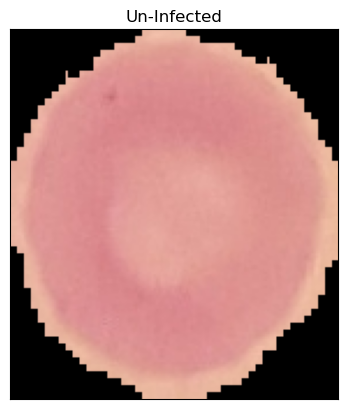

In [12]:
#Plotting and saving the image
plt.imshow(train_img_uninfected)
plt.xticks(ticks=[])
plt.yticks(ticks=[])
plt.title("Un-Infected")
#plt.savefig('_plots/uninfected.jpeg')
plt.show()

# Loading Data

Using datasets.ImageFolder()

# Applying transforms

In [13]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Greyscale image
    transforms.Grayscale(),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [14]:
train_data = datasets.ImageFolder('_data_setup/cell_images/train',transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder('_data_setup/cell_images/test',transform=data_transform,target_transform=None)

In [15]:
train_data

Dataset ImageFolder
    Number of datapoints: 26250
    Root location: _data_setup/cell_images/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [16]:
test_data

Dataset ImageFolder
    Number of datapoints: 1308
    Root location: _data_setup/cell_images/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [17]:
#Classes of the data
classes = train_data.classes

In [18]:
train_data.class_to_idx

{'infected': 0, 'uninfected': 1}

In [19]:
test_data.classes

['infected', 'uninfected']

In [20]:
test_data.class_to_idx

{'infected': 0, 'uninfected': 1}

In [21]:
#The size of the training dats and test_data
len(train_data),len(test_data)

(26250, 1308)

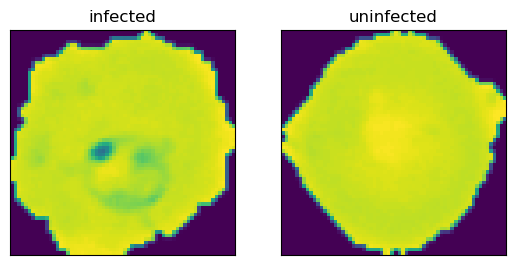

In [24]:
#Plotting the first image in the training data which belong to 'infected' class
plt.subplot(1,2,1)
Image,label = train_data[0]
plt.imshow(Image.permute(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title(classes[label])

#Plotting the first image in the training data which belong to 'un-infected' class
plt.subplot(1,2,2)
Image,label = train_data[12726]
plt.imshow(Image.permute(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title(classes[label])
#plt.savefig('_plots/infected vs uninfected.jpeg')

plt.show()

In [25]:
#Convertin the traing data and test data into batches of batch size 32
train_batches = DataLoader(train_data,batch_size=32,shuffle=True)
test_batches = DataLoader(test_data,batch_size=32,shuffle=True)

In [26]:
train_batch = next(iter(train_batches))
test_batch = next(iter(test_batches))

In [27]:
print(f"The number batches in train_batches are {len(train_batches)} and each batch contains {len(train_batch[0])} images")
print(f"The number batches in train_batches are {len(test_batches)} and each batch contains {len(test_batch[0])} images")

The number batches in train_batches are 821 and each batch contains 32 images
The number batches in train_batches are 41 and each batch contains 32 images


In [28]:
len(train_data)/32,len(test_data)/32

(820.3125, 40.875)

In [29]:
#Tuple unpacking of Images and labels from train_batch
Images,labels = train_batch

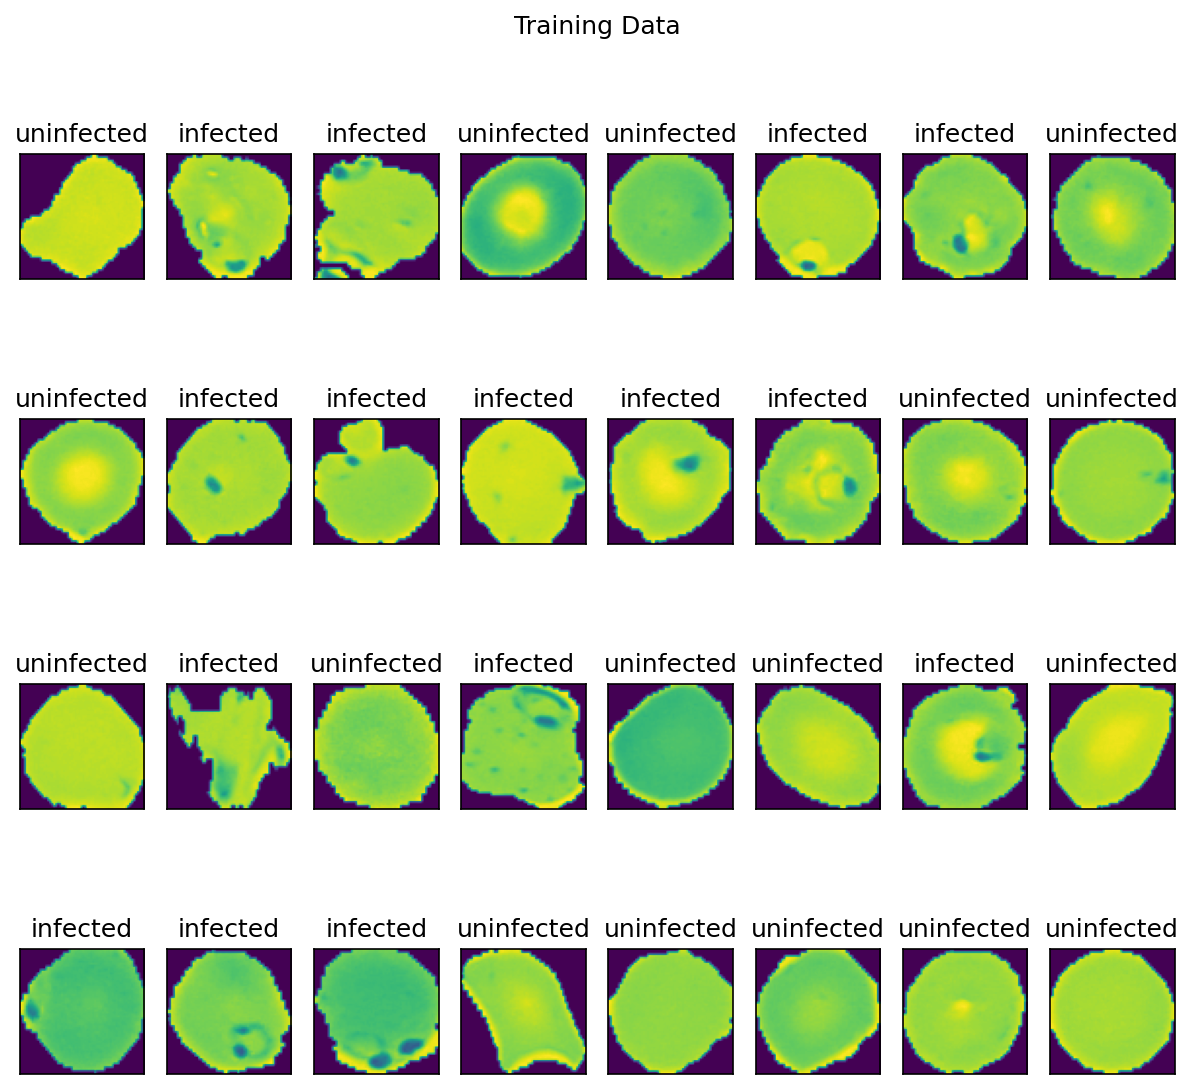

In [30]:
#Defining the figure size and dpi
plt.figure(figsize=(8,8),dpi =150)

#Iterarting through the list of Images in the variable Images
for num,image in enumerate(Images):
    
    plt.subplot(4,8,num+1) #Creating subplots 
    
    plt.imshow(image.permute(1,2,0)) #Ploting image by permuting the tensor from (c,x,y) -> (x,y,c)
    
    plt.xticks([]) #Removing xticks
    
    plt.yticks([]) #Removing yticks
    
    plt.title(classes[labels[num].item()]) #Labelling the title of each subplot with their respective class
    
plt.suptitle("Training Data") #Adding supreme titile

plt.tight_layout() #Making sure there is no overlap

#plt.savefig('_plots/training_batch_0.jpeg') #Saving the image
 
plt.show()

In [31]:
#Tuple unpacking of Images and labels from test_batch
Images,labels = test_batch

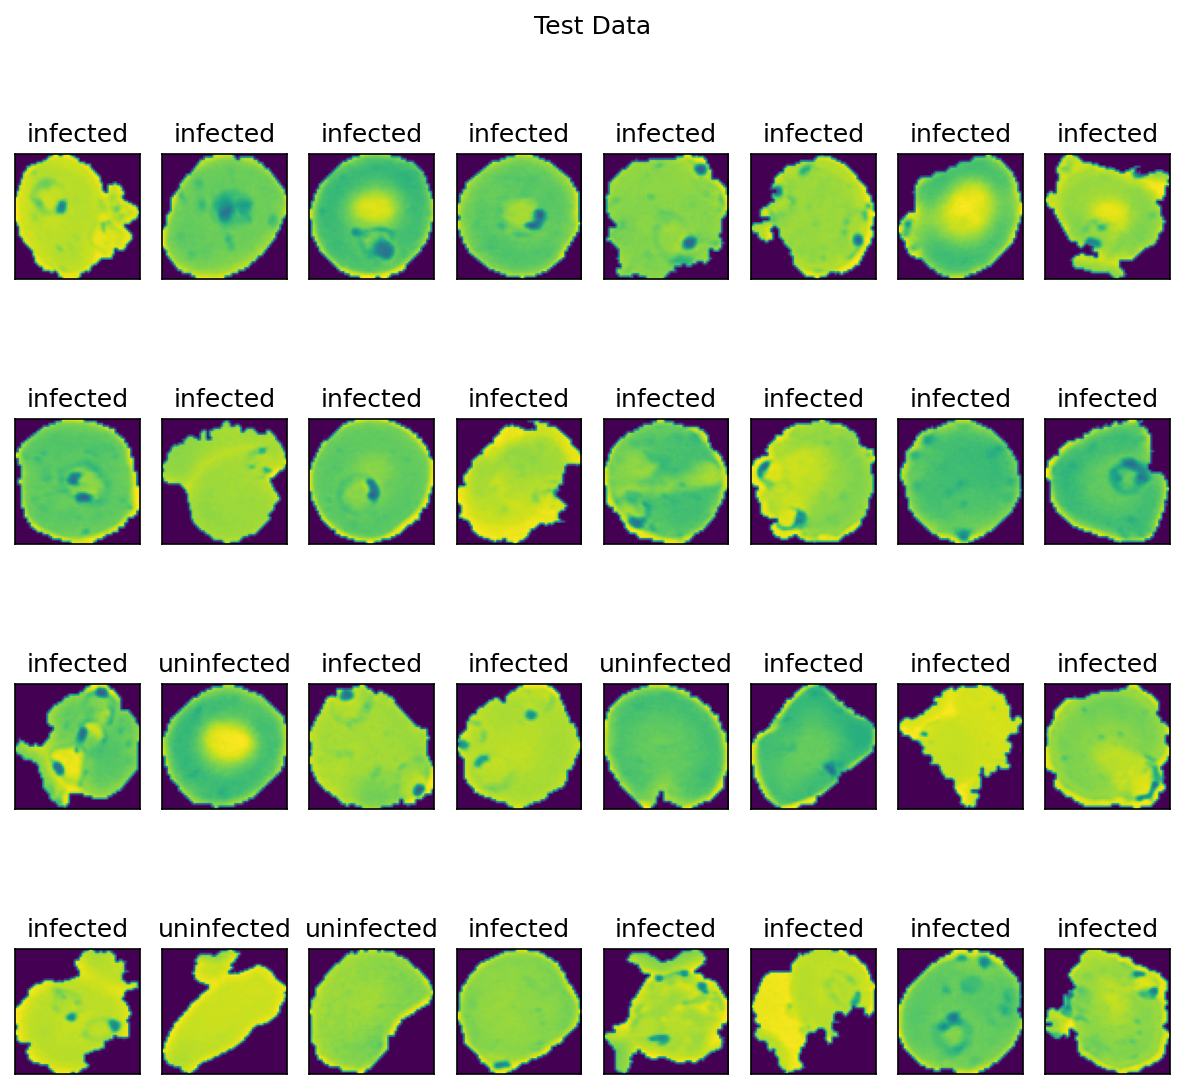

In [32]:
#Defining the figure size and dpi
plt.figure(figsize=(8,8),dpi =150)

#Iterarting through the list of Images in the variable Images
for num,image in enumerate(Images):
    
    plt.subplot(4,8,num+1) #Creating subplots 
    
    plt.imshow(image.permute(1,2,0)) #Ploting image by permuting the tensor from (c,x,y) -> (x,y,c)
    
    plt.xticks([]) #Removing xticks
    
    plt.yticks([]) #Removing yticks
    
    plt.title(classes[labels[num].item()]) #Labelling the title of each subplot with their respective class
    
plt.suptitle("Test Data") #Adding supreme titile

plt.tight_layout() #Making sure there is no overlap

#plt.savefig('_plots/test_batch_0.jpeg') #Saving the image
 
plt.show()

In [33]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

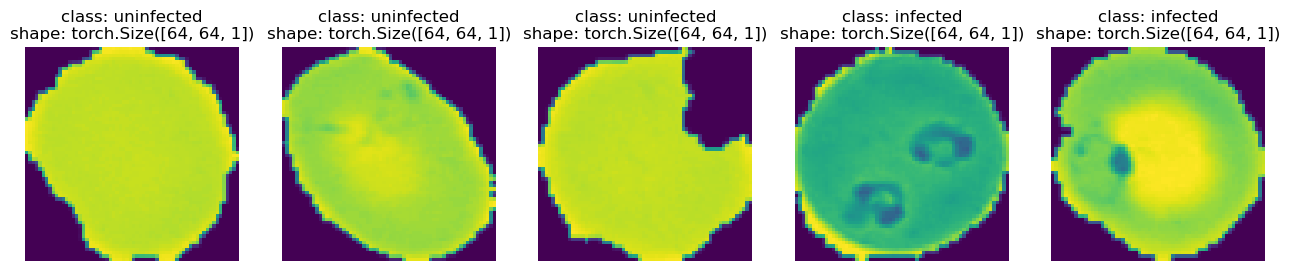

In [36]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=classes,
                      seed=None)
#plt.savefig('_plots/random_train_0.jpeg')

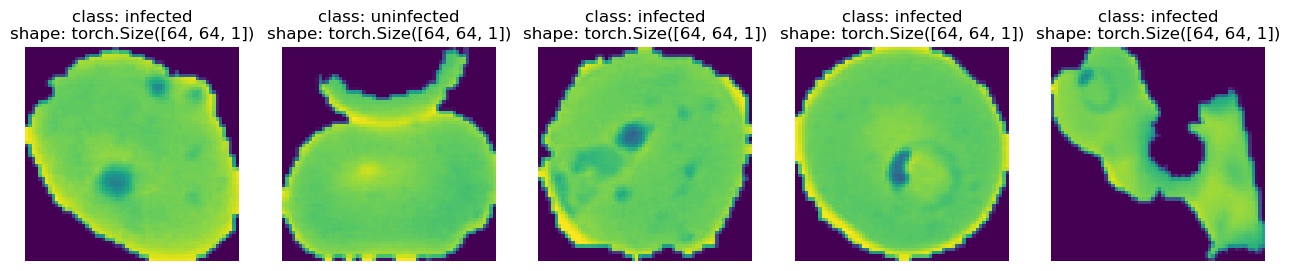

In [37]:
# Display random images from ImageFolder created Dataset
display_random_images(test_data, 
                      n=5, 
                      classes=classes,
                      seed=None)
#plt.savefig('_plots/random_test_0.jpeg')

In [38]:
class TinyVGG(nn.Module):
    """
    Computer vision architecture : TinyVGG
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

In [39]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=1, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes))
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [40]:
#model_0.state_dict()

# Trying a forward pass on a single image

In [41]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_batches))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single)
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{classes[torch.argmax(torch.softmax(pred, dim=1), dim=1).item()]}\n")
print(f"Actual label:\n{classes[label_single]}")

Single image shape: torch.Size([1, 1, 64, 64])

Output logits:
tensor([[ 0.0087, -0.0055]])

Output prediction probabilities:
tensor([[0.5036, 0.4964]])

Output prediction label:
infected

Actual label:
infected


In [42]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X, y

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [43]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X, y
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [44]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
         patience: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Early Stopping
    counter = 0
    best_accuray = 0
    
    # 4. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 5. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 6. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
        if best_accuray < results['test_acc'][-1]:
            best_accuray = results['test_acc'][-1]
            state_dict = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
        
        if counter == patience:
            break

    # 7. Return the filled results and state_dict at the end of the epochs
    return results,state_dict

In [45]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=1, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results,state_dict = train(model=model_0, 
                        train_dataloader=train_batches,
                        test_dataloader=test_batches,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6322 | train_acc: 0.6231 | test_loss: 0.4113 | test_acc: 0.8175
Epoch: 2 | train_loss: 0.4175 | train_acc: 0.8148 | test_loss: 0.3940 | test_acc: 0.8595
Epoch: 3 | train_loss: 0.2264 | train_acc: 0.9180 | test_loss: 0.2447 | test_acc: 0.9082
Epoch: 4 | train_loss: 0.1712 | train_acc: 0.9430 | test_loss: 0.3403 | test_acc: 0.9137
Epoch: 5 | train_loss: 0.1592 | train_acc: 0.9461 | test_loss: 0.2277 | test_acc: 0.9304
Epoch: 6 | train_loss: 0.1536 | train_acc: 0.9487 | test_loss: 0.1959 | test_acc: 0.9325
Epoch: 7 | train_loss: 0.1489 | train_acc: 0.9508 | test_loss: 0.1600 | test_acc: 0.9525
Epoch: 8 | train_loss: 0.1437 | train_acc: 0.9509 | test_loss: 0.2064 | test_acc: 0.9450
Epoch: 9 | train_loss: 0.1441 | train_acc: 0.9507 | test_loss: 0.2257 | test_acc: 0.9404
Epoch: 10 | train_loss: 0.1398 | train_acc: 0.9534 | test_loss: 0.1596 | test_acc: 0.9441
Total training time: 580.299 seconds


In [46]:
#Loading the state_dict which has the highest accuracy on test data
model_0.load_state_dict(state_dict)

<All keys matched successfully>

In [47]:
avg_acc = 0

for batch, (Images,labels) in enumerate(test_batches,start = 1):
    
    model_0.eval()
    
    with torch.inference_mode():
        logits = model_0(Images)
    
    pred = logits.softmax(dim = 1).argmax(dim = 1)
    
    avg_acc += accuracy_score(pred,labels)*100
    
print(f"Average accuracy of the test data is {avg_acc/batch : 0.2f}")
    

Average accuracy of the test data is  94.57


In [48]:
print("\t\t\tClassification Report\n")
print(classification_report(labels,pred))

			Classification Report

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.71      0.83         7

    accuracy                           0.93        28
   macro avg       0.96      0.86      0.89        28
weighted avg       0.93      0.93      0.92        28



In [49]:
confusion_matrix(labels,pred)

array([[21,  0],
       [ 2,  5]])

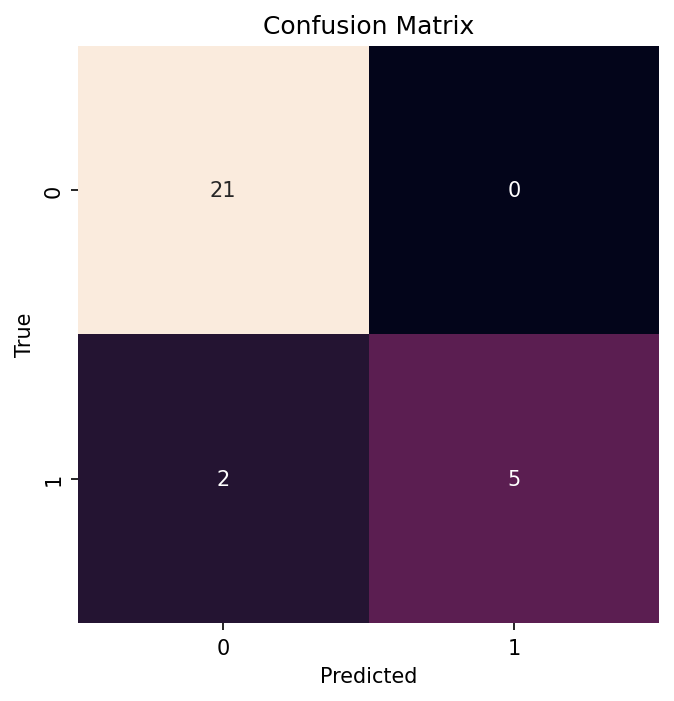

In [53]:
import seaborn as sns
plt.figure(figsize=(5,5),dpi  = 150)
sns.heatmap(confusion_matrix(labels,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title('Confusion Matrix')
#plt.savefig('_plots/confusion_matrix_0.jpeg')
plt.show()

In [54]:
pastel = sns.color_palette('pastel')

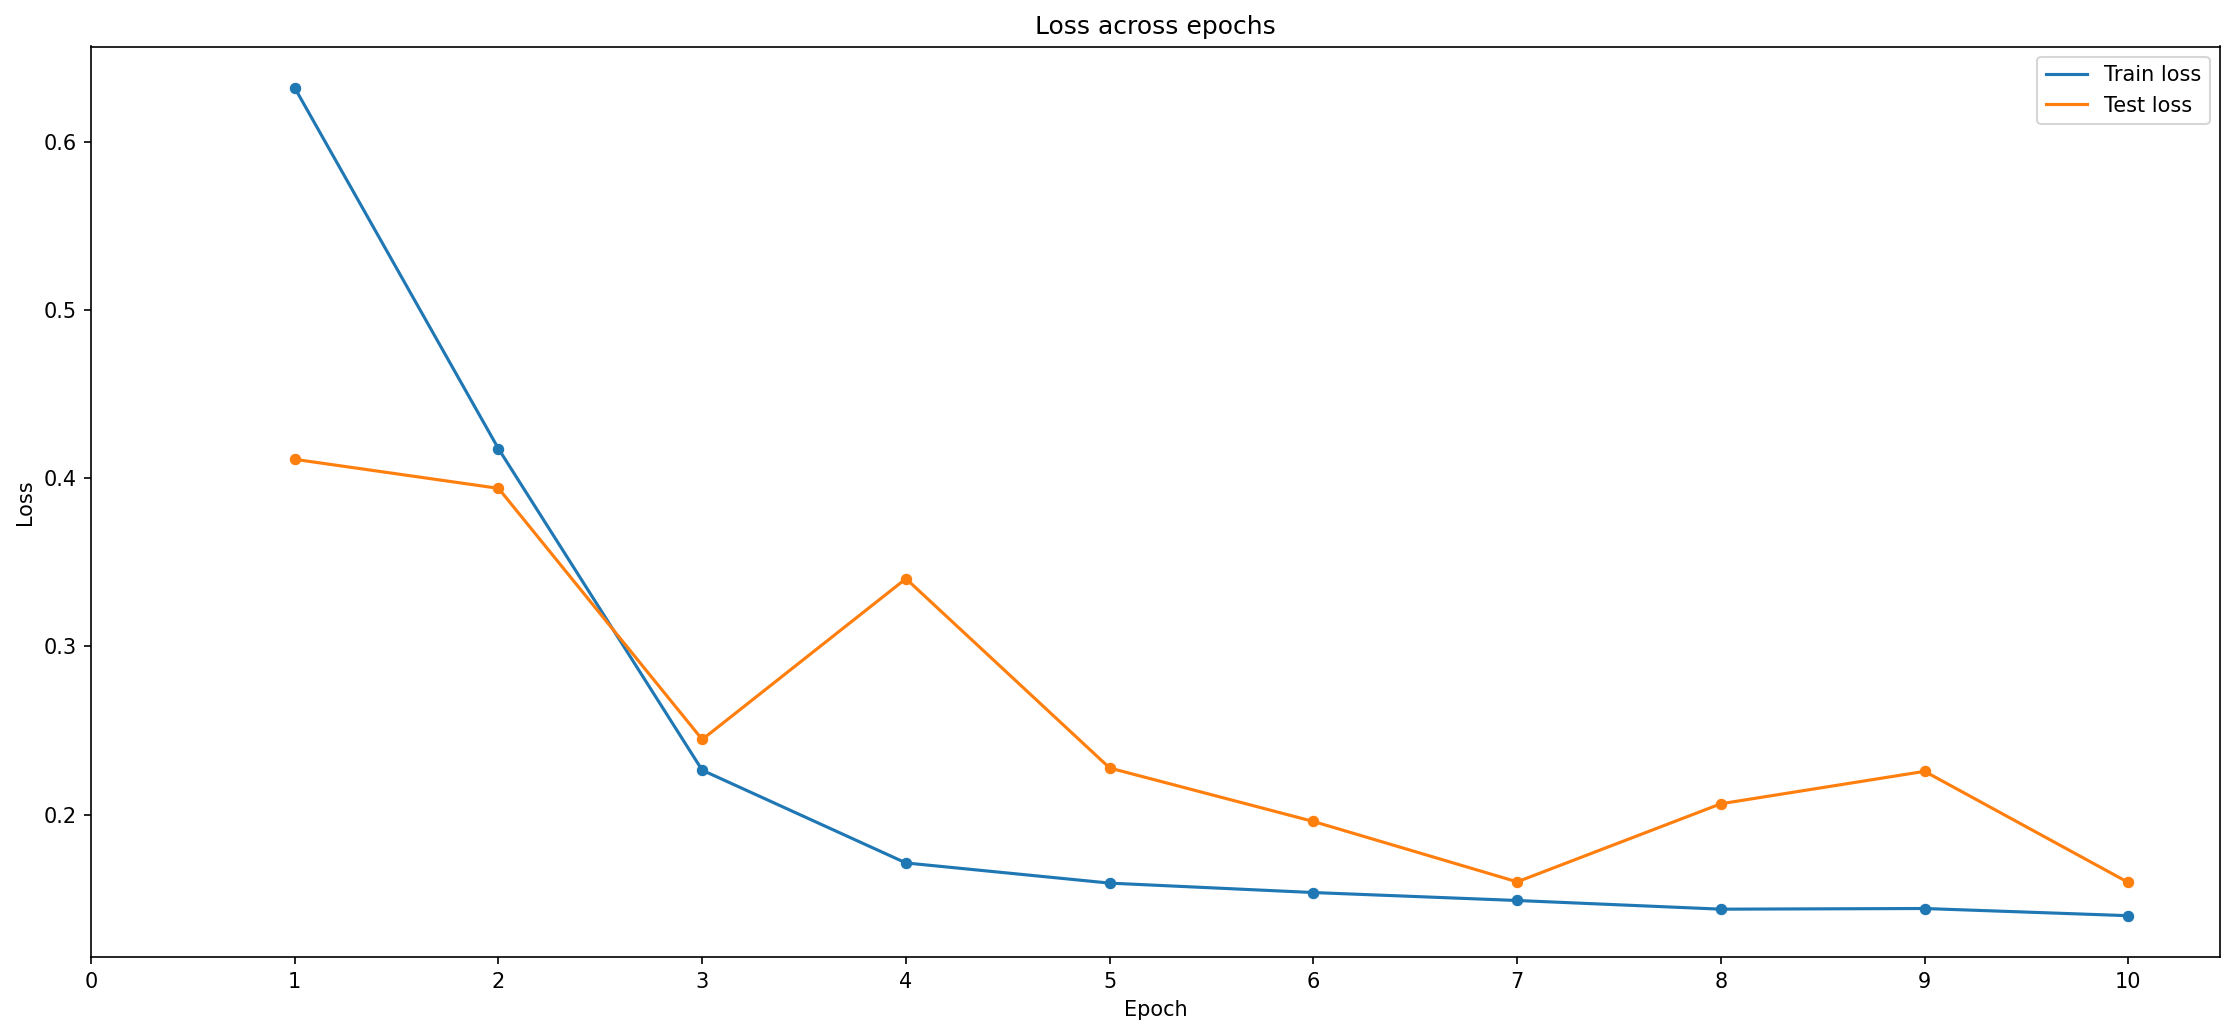

In [55]:
plt.figure(figsize=(15,7),dpi = 150)
sns.lineplot(x = range(1,len(model_0_results['train_loss'])+1), y = model_0_results['train_loss'],
             label = 'Train loss',palette=pastel[0])
sns.lineplot(x = range(1,len(model_0_results['test_loss'])+1), y = model_0_results['test_loss'],
             label = 'Test loss',palette=pastel[1])
sns.scatterplot(x = range(1,len(model_0_results['train_loss'])+1), y = model_0_results['train_loss'])
sns.scatterplot(x = range(1,len(model_0_results['test_loss'])+1), y = model_0_results['test_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([_ for _ in range(11)])
plt.title('Loss across epochs')
plt.tight_layout()
#plt.savefig('_plots/loss_epochs_0.jpeg')
plt.show()

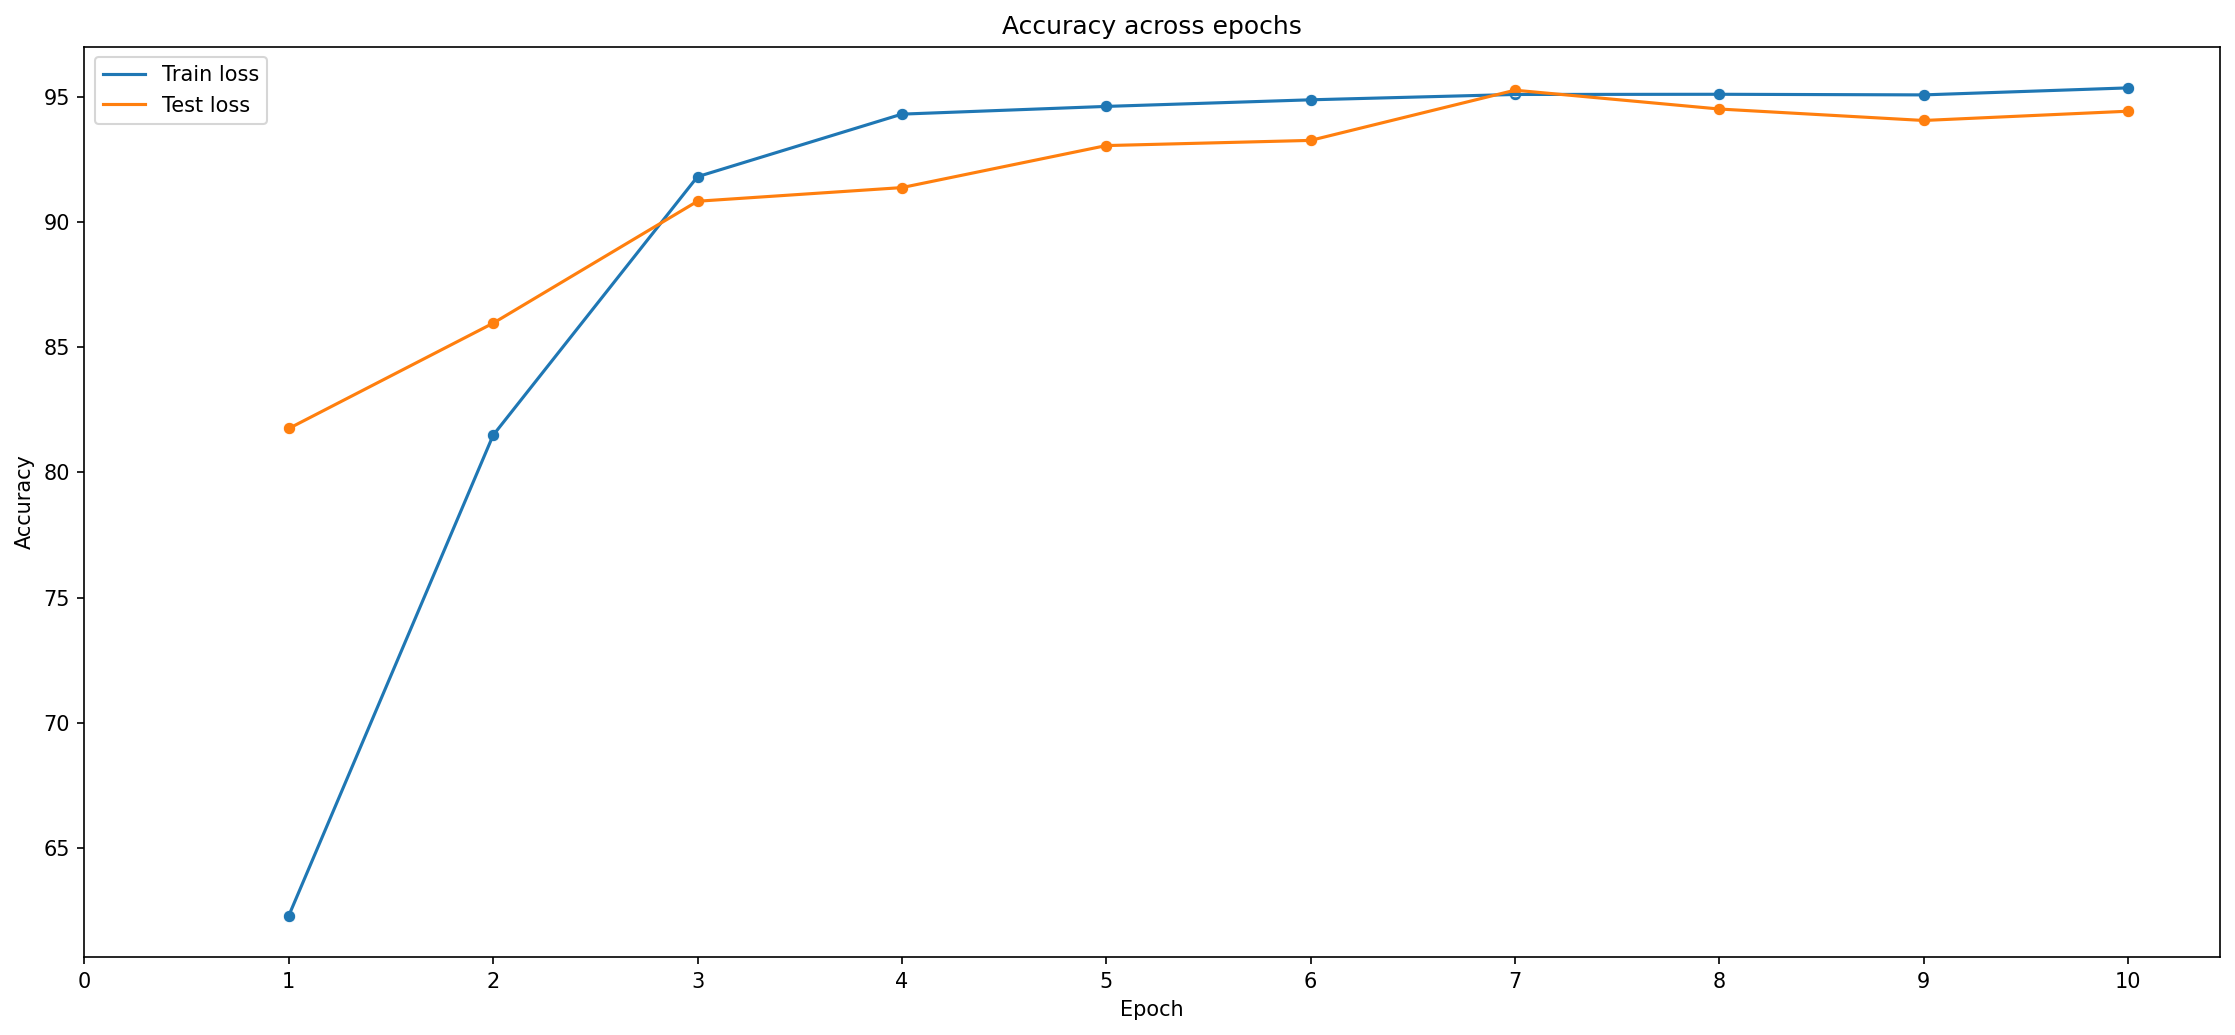

In [56]:
plt.figure(figsize=(15,7),dpi = 150)
sns.lineplot(x = range(1,len(model_0_results['train_acc'])+1), y = [x*100 for x in model_0_results['train_acc']],
             label = 'Train loss',palette=pastel[0])
sns.lineplot(x = range(1,len(model_0_results['test_acc'])+1), y = [x*100 for x in model_0_results['test_acc']],
             label = 'Test loss',palette=pastel[1])
sns.scatterplot(x = range(1,len(model_0_results['train_acc'])+1), y = [x*100 for x in model_0_results['train_acc']])
sns.scatterplot(x = range(1,len(model_0_results['test_acc'])+1), y = [x*100 for x in model_0_results['test_acc']])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([_ for _ in range(11)])
plt.title('Accuracy across epochs')
plt.tight_layout()
#plt.savefig('_plots/accuracy_epochs_0.jpeg')
plt.show()

In [58]:
#Saving the model
#torch.save(model_0,'_models/model_0.pth')

# Trying to understand where our model failed

In [59]:
misclassified_lst = []

for num,(image,label) in enumerate(test_data,start=1):
    
    model_0.eval()
    with torch.inference_mode():
        logits = model_0(image.reshape(1,1,64,64))
        
    pred = logits.softmax(dim = 1).argmax(dim = 1)
    
    if label != pred.item():
        misclassified_lst.append((image,label,pred.item()))

In [60]:
len(misclassified_lst)

71

In [61]:
random_choice = random.choices(misclassified_lst,k = 32)

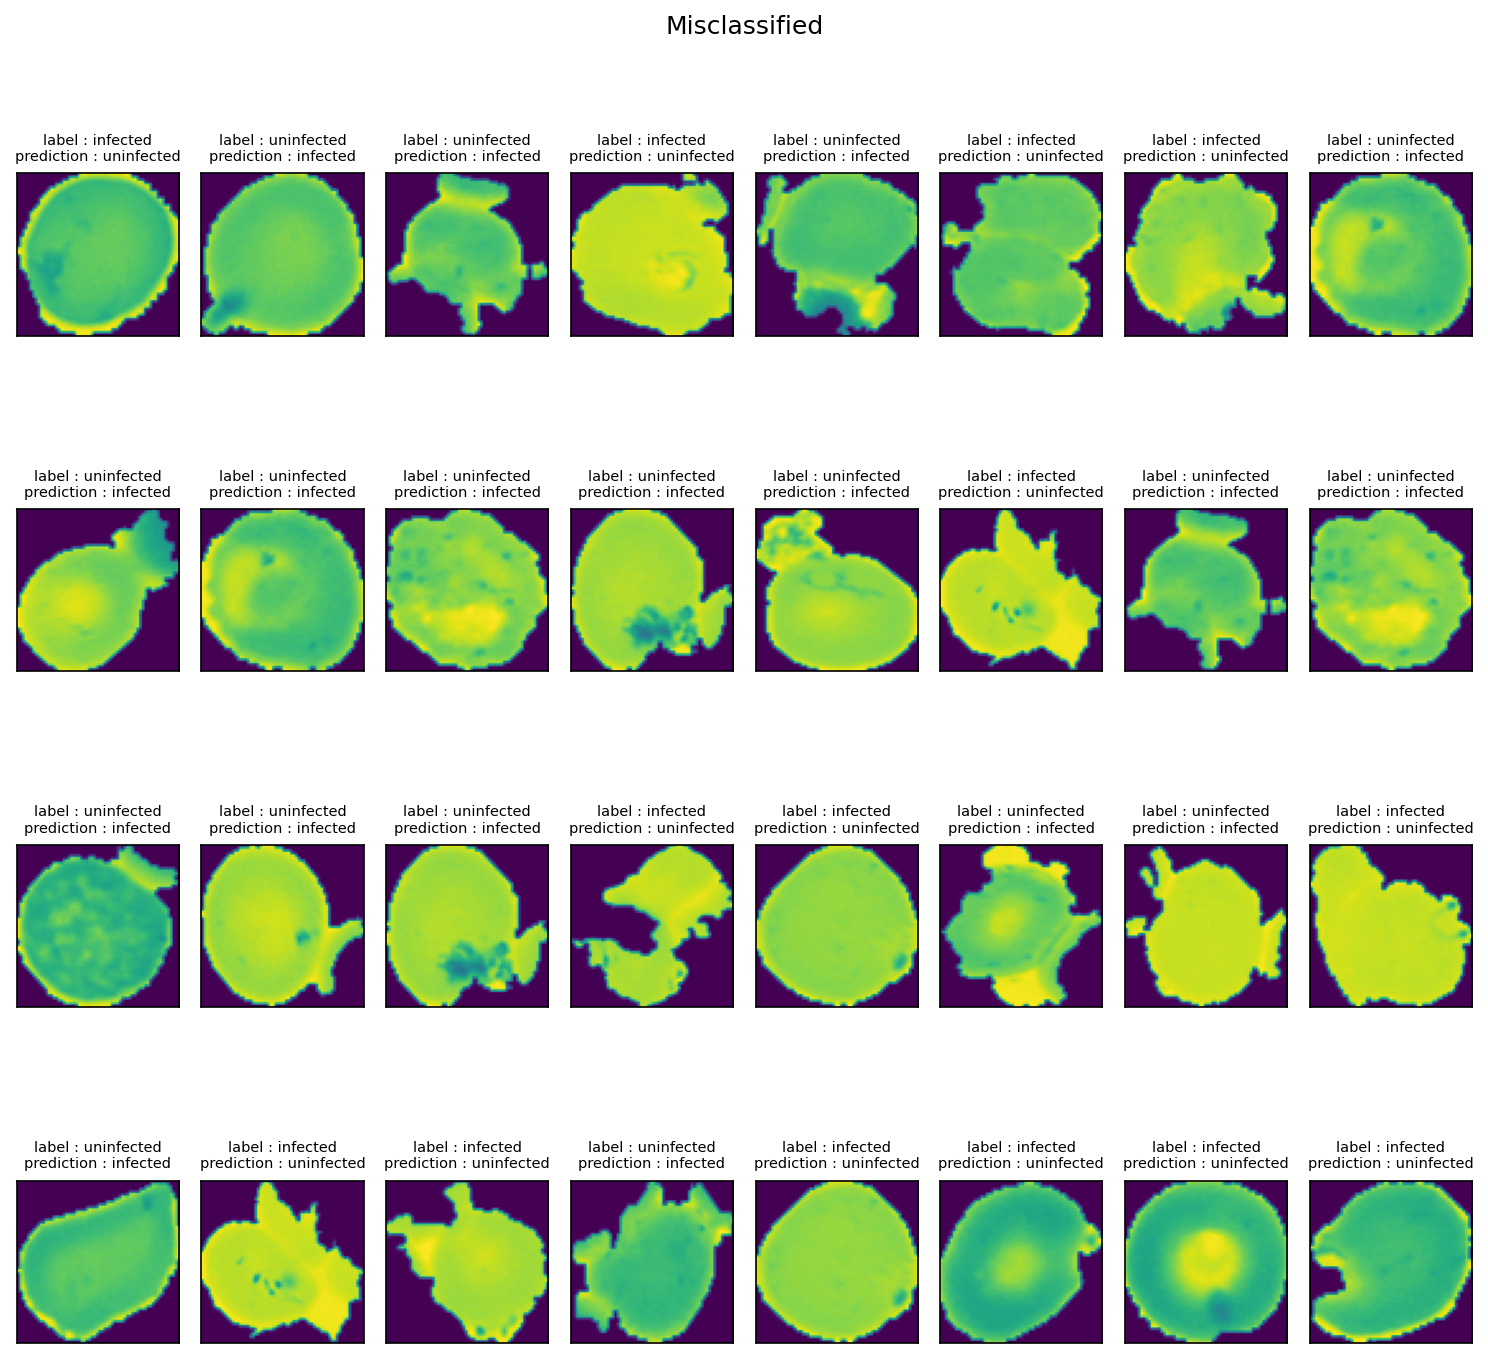

In [62]:
plt.figure(figsize=(10,10),dpi = 150)
for num, (image_,label_,pred_) in enumerate(random_choice,start = 1):
    
    plt.subplot(4,8,num)
    
    plt.imshow(image_.permute(1,2,0))
    
    plt.xticks([])
    
    plt.yticks([])
    
    plt.title(f"label : {classes[label_]}\n"
             f"prediction : {classes[pred_]}",fontdict={'fontsize':7})
    
plt.suptitle("Misclassified")

plt.tight_layout()

plt.show()

On observation, it is evident that the color grading is some how effecting the model's performace. So this time we try coverting it to original images by removing transforms.Grayscale() transformer from tranforms.compose() from torchvision library

# Removing greyscale transformation

In [63]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [64]:
train_data = datasets.ImageFolder('_data_setup/cell_images/train',transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder('_data_setup/cell_images/test',transform=data_transform,target_transform=None)

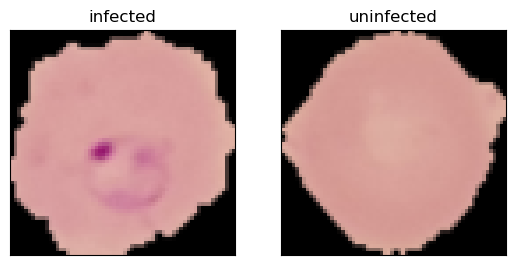

In [66]:
#Plotting the first image in the training data which belong to 'infected' class
plt.subplot(1,2,1)
Image,label = train_data[0]
plt.imshow(Image.permute(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title(classes[label])

#Plotting the first image in the training data which belong to 'un-infected' class
plt.subplot(1,2,2)
Image,label = train_data[12726]
plt.imshow(Image.permute(1,2,0))
plt.xticks([])
plt.yticks([])
plt.title(classes[label])
#plt.savefig('_plots/infected vs uninfected_1.jpeg')

plt.show()

In [67]:
#Converting the traing data and test data into batches of batch size 32
train_batches = DataLoader(train_data,batch_size=32,shuffle=True)
test_batches = DataLoader(test_data,batch_size=32,shuffle=True)

In [68]:
train_batch = next(iter(train_batches))
test_batch = next(iter(test_batches))

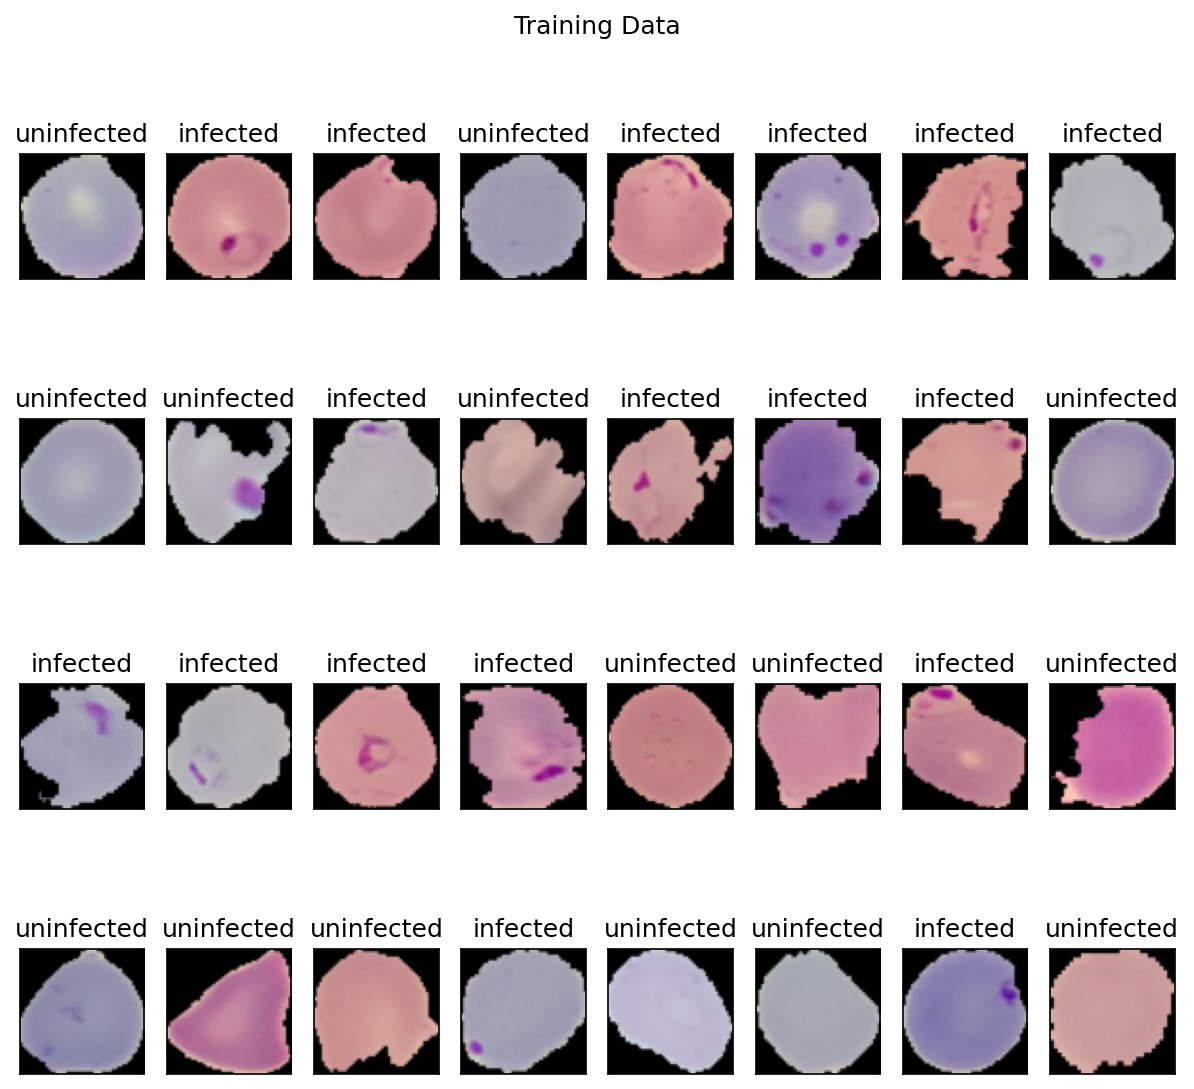

In [69]:
#Tuple unpacking of Images and labels from train_batch
Images,labels = train_batch

#Defining the figure size and dpi
plt.figure(figsize=(8,8),dpi =150)

#Iterarting through the list of Images in the variable Images
for num,image in enumerate(Images):
    
    plt.subplot(4,8,num+1) #Creating subplots 
    
    plt.imshow(image.permute(1,2,0)) #Ploting image by permuting the tensor from (c,x,y) -> (x,y,c)
    
    plt.xticks([]) #Removing xticks
    
    plt.yticks([]) #Removing yticks
    
    plt.title(classes[labels[num].item()]) #Labelling the title of each subplot with their respective class
    
plt.suptitle("Training Data") #Adding supreme titile

plt.tight_layout() #Making sure there is no overlap

#plt.savefig('_plots/training_batch_1.jpeg') #Saving the image
 
plt.show()

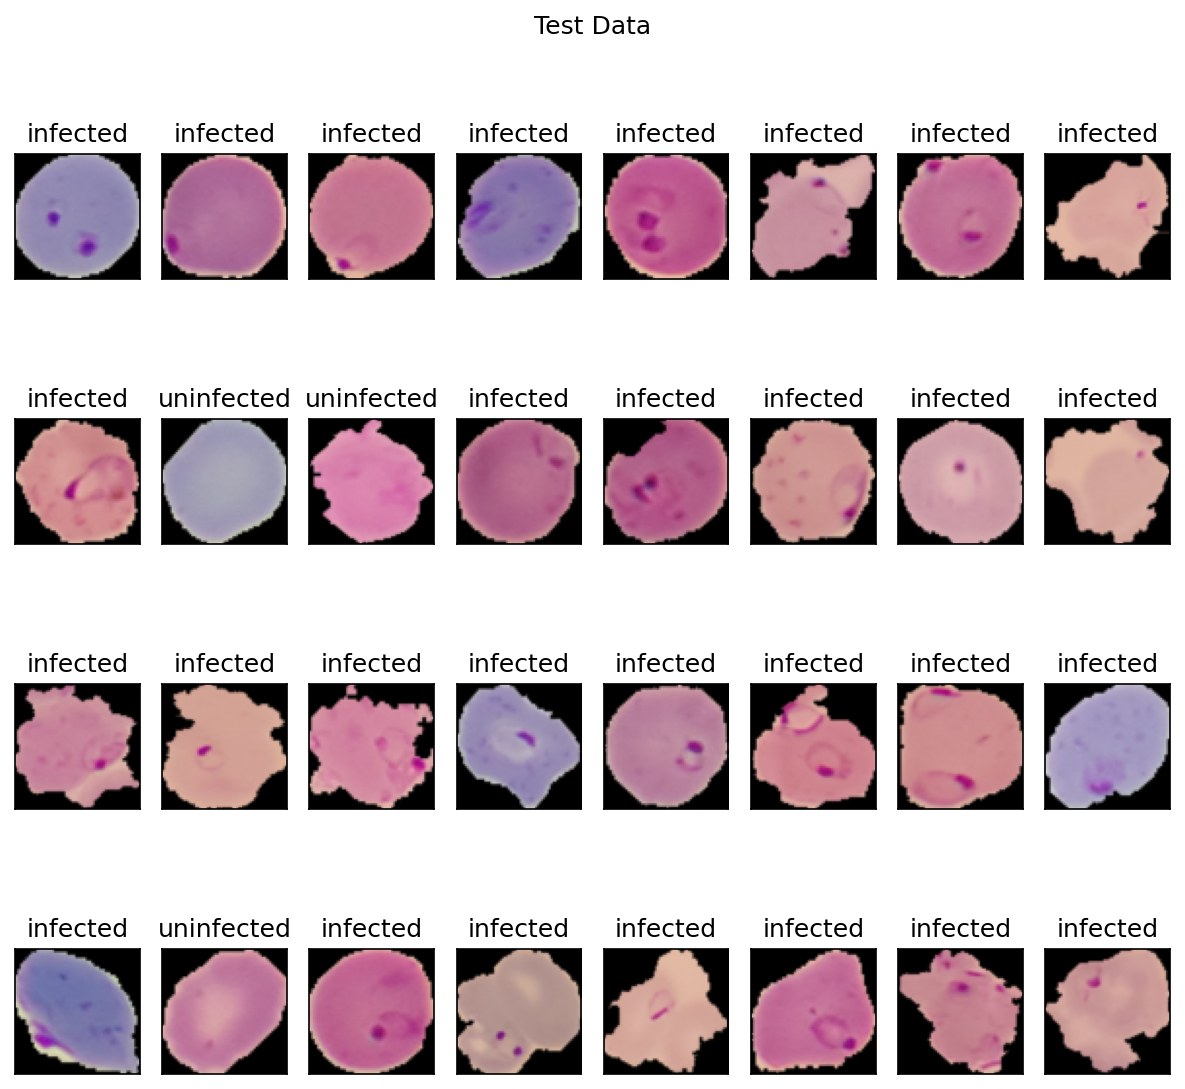

In [70]:
#Tuple unpacking of Images and labels from train_batch
Images,labels = test_batch

#Defining the figure size and dpi
plt.figure(figsize=(8,8),dpi =150)

#Iterarting through the list of Images in the variable Images
for num,image in enumerate(Images):
    
    plt.subplot(4,8,num+1) #Creating subplots 
    
    plt.imshow(image.permute(1,2,0)) #Ploting image by permuting the tensor from (c,x,y) -> (x,y,c)
    
    plt.xticks([]) #Removing xticks
    
    plt.yticks([]) #Removing yticks
    
    plt.title(classes[labels[num].item()]) #Labelling the title of each subplot with their respective class
    
plt.suptitle("Test Data") #Adding supreme titile

plt.tight_layout() #Making sure there is no overlap

#plt.savefig('_plots/training_batch_1.jpeg') #Saving the image
 
plt.show()

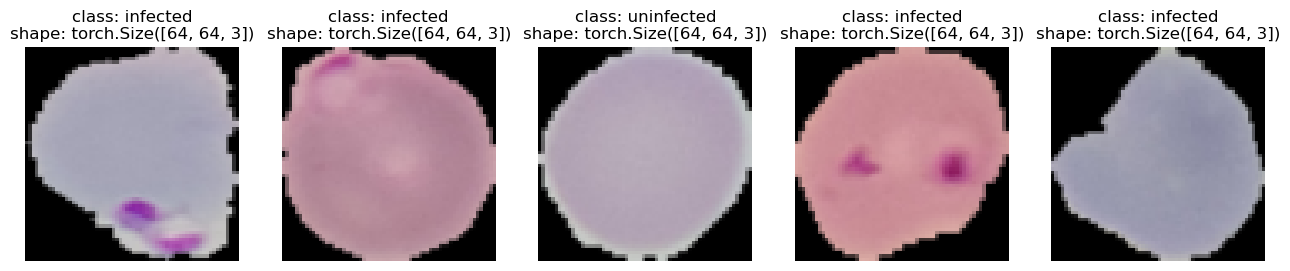

In [71]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=classes,
                      seed=None)

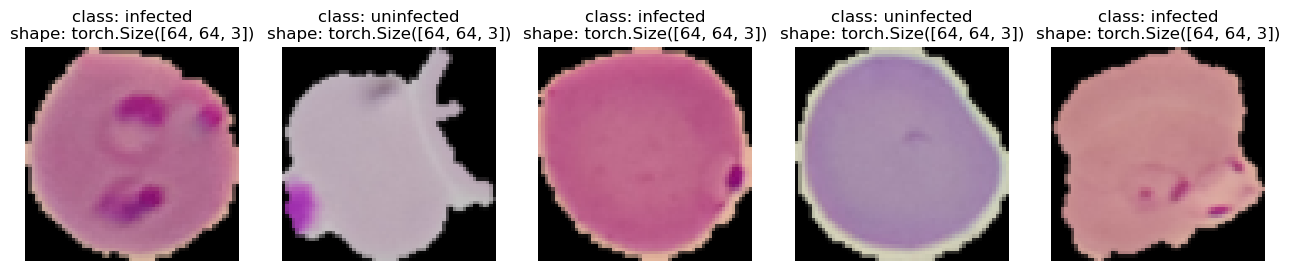

In [72]:
# Display random images from ImageFolder created Dataset
display_random_images(test_data, 
                      n=5, 
                      classes=classes,
                      seed=None)

In [73]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes))
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [74]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_batches))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_1.eval()
with torch.inference_mode():
    pred = model_1(img_single)
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{classes[torch.argmax(torch.softmax(pred, dim=1), dim=1).item()]}\n")
print(f"Actual label:\n{classes[label_single]}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0529, 0.0552]])

Output prediction probabilities:
tensor([[0.4994, 0.5006]])

Output prediction label:
uninfected

Actual label:
infected


In [75]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 10

# Recreate an instance of TinyVGG
model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes))

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_1_results,state_dict = train(model=model_1, 
                        train_dataloader=train_batches,
                        test_dataloader=test_batches,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5655 | train_acc: 0.6724 | test_loss: 0.2264 | test_acc: 0.9143
Epoch: 2 | train_loss: 0.1827 | train_acc: 0.9413 | test_loss: 0.2211 | test_acc: 0.9220
Epoch: 3 | train_loss: 0.1560 | train_acc: 0.9516 | test_loss: 0.2501 | test_acc: 0.9321
Epoch: 4 | train_loss: 0.1502 | train_acc: 0.9524 | test_loss: 0.2043 | test_acc: 0.9427
Epoch: 5 | train_loss: 0.1431 | train_acc: 0.9548 | test_loss: 0.1827 | test_acc: 0.9388
Epoch: 6 | train_loss: 0.1399 | train_acc: 0.9552 | test_loss: 0.2460 | test_acc: 0.9289
Epoch: 7 | train_loss: 0.1372 | train_acc: 0.9553 | test_loss: 0.1756 | test_acc: 0.9449
Epoch: 8 | train_loss: 0.1350 | train_acc: 0.9561 | test_loss: 0.1634 | test_acc: 0.9496
Epoch: 9 | train_loss: 0.1314 | train_acc: 0.9572 | test_loss: 0.2056 | test_acc: 0.9435
Epoch: 10 | train_loss: 0.1312 | train_acc: 0.9576 | test_loss: 0.1551 | test_acc: 0.9496
Total training time: 586.893 seconds


In [76]:
#Loading the state_dict which has the highest accuracy on test data
model_1.load_state_dict(state_dict)

<All keys matched successfully>

In [77]:
avg_acc = 0

for batch, (Images,labels) in enumerate(test_batches,start = 1):
    
    model_1.eval()
    
    with torch.inference_mode():
        logits = model_1(Images)
    
    pred = logits.softmax(dim = 1).argmax(dim = 1)
    
    avg_acc += accuracy_score(pred,labels)*100
    
print(f"Average accuracy of the test data is {avg_acc/batch : 0.2f}")
    

Average accuracy of the test data is  94.97


In [78]:
print("\t\t\tClassification Report\n")
print(classification_report(labels,pred))

			Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         3

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



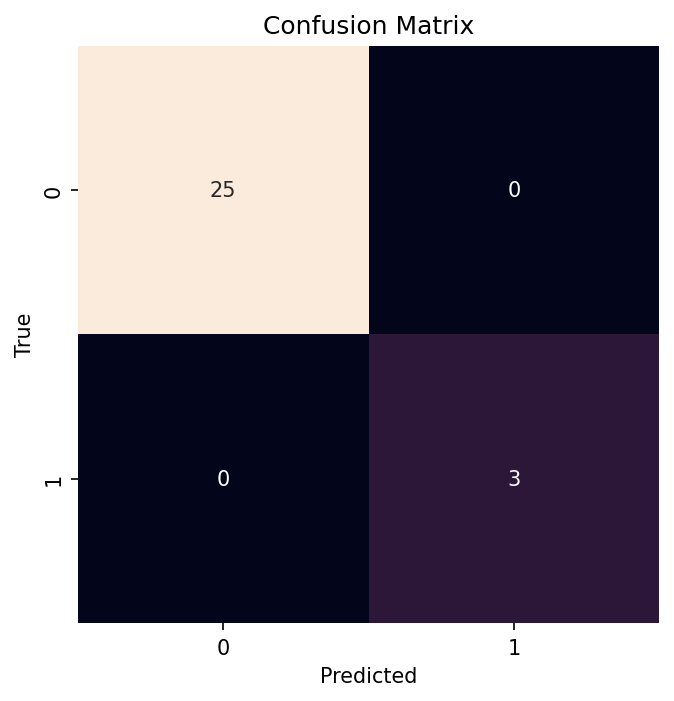

In [79]:
import seaborn as sns
plt.figure(figsize=(5,5),dpi  = 150)
sns.heatmap(confusion_matrix(labels,pred),annot=True,cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title('Confusion Matrix')
#plt.savefig('_plots/confusion_matrix.jpeg')
plt.show()

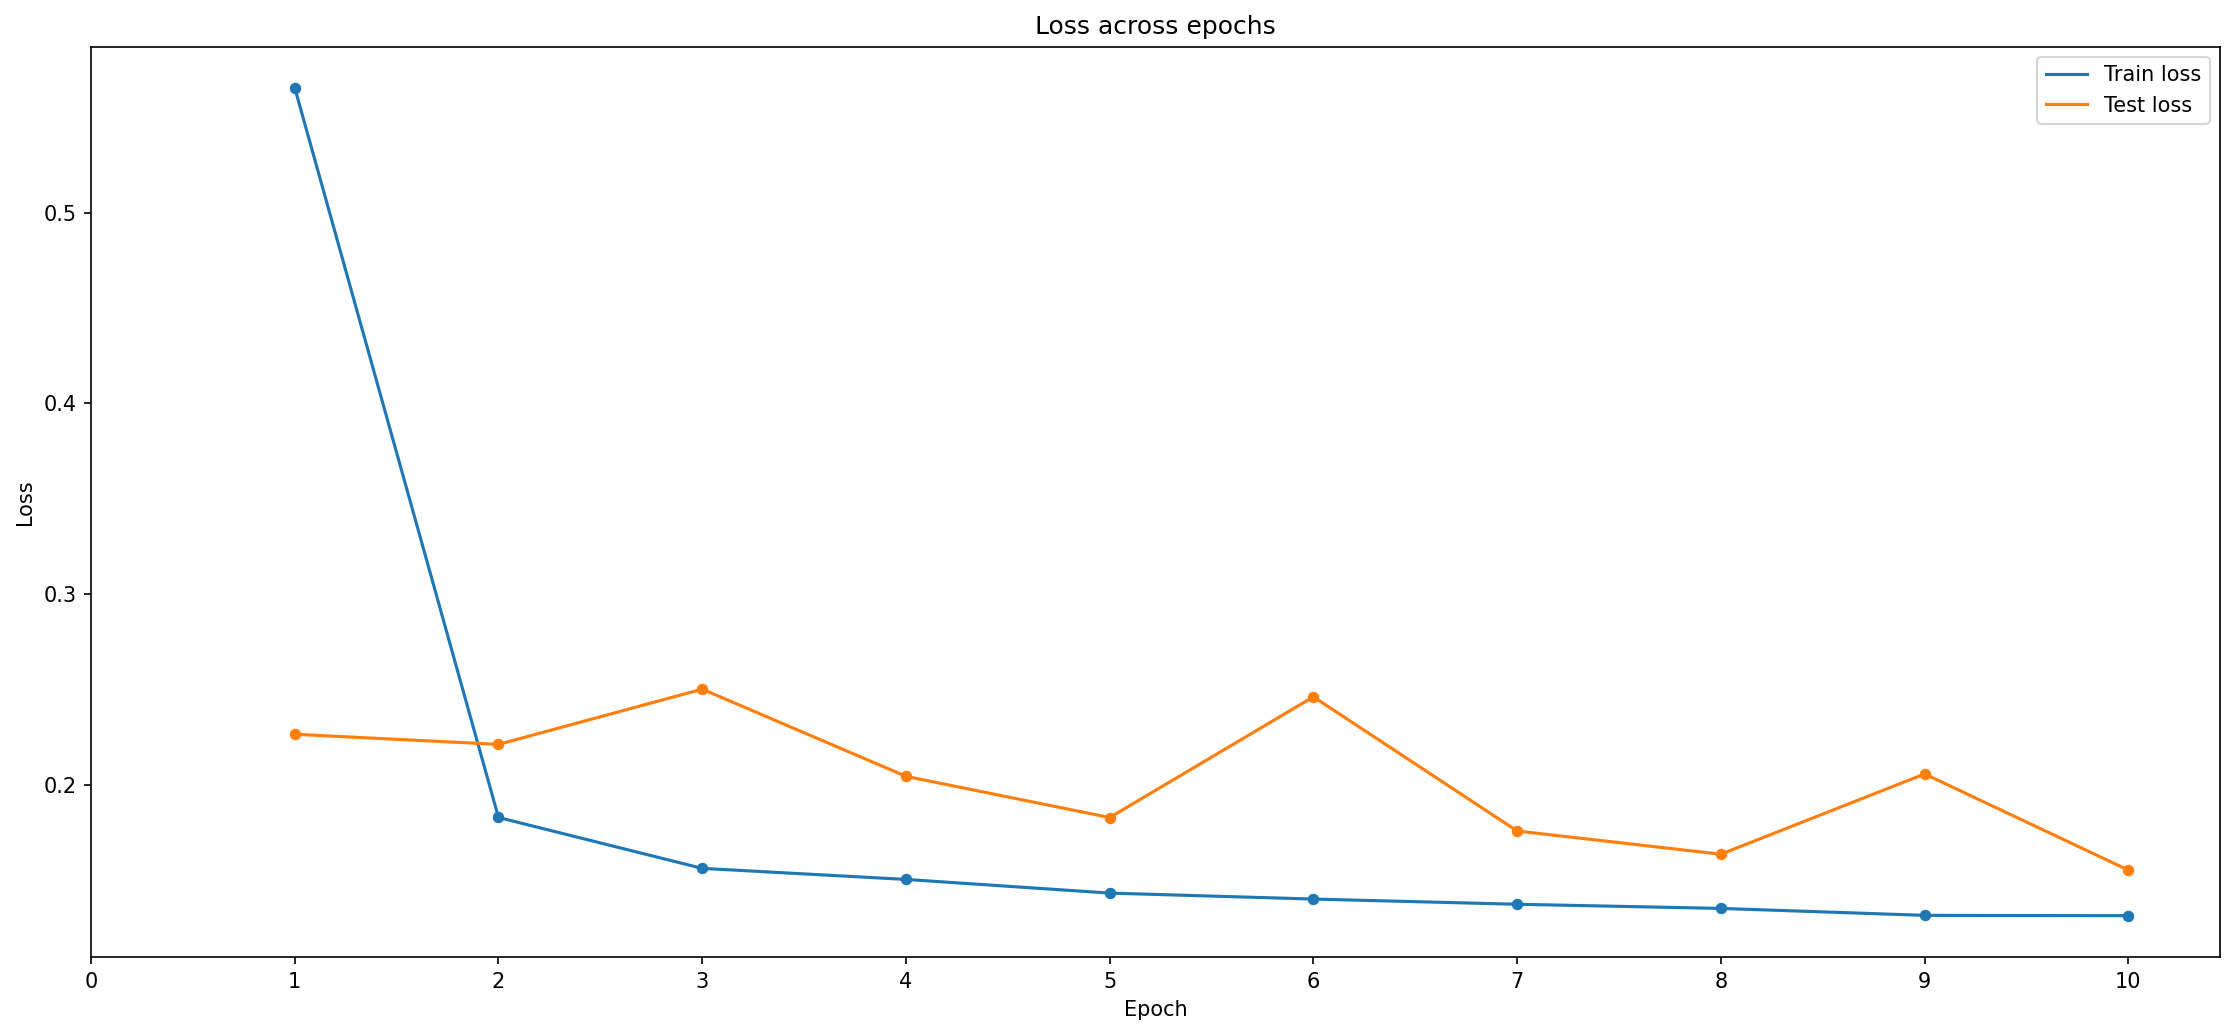

In [81]:
plt.figure(figsize=(15,7),dpi = 150)
sns.lineplot(x = range(1,len(model_1_results['train_loss'])+1), y = model_1_results['train_loss'],
             label = 'Train loss',palette=pastel[0])
sns.lineplot(x = range(1,len(model_1_results['test_loss'])+1), y = model_1_results['test_loss'],
             label = 'Test loss',palette=pastel[1])
sns.scatterplot(x = range(1,len(model_1_results['train_loss'])+1), y = model_1_results['train_loss'])
sns.scatterplot(x = range(1,len(model_1_results['test_loss'])+1), y = model_1_results['test_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([_ for _ in range(11)])
plt.title('Loss across epochs')
plt.tight_layout()
#plt.savefig('_plots/loss_epochs_1.jpeg')
plt.show()

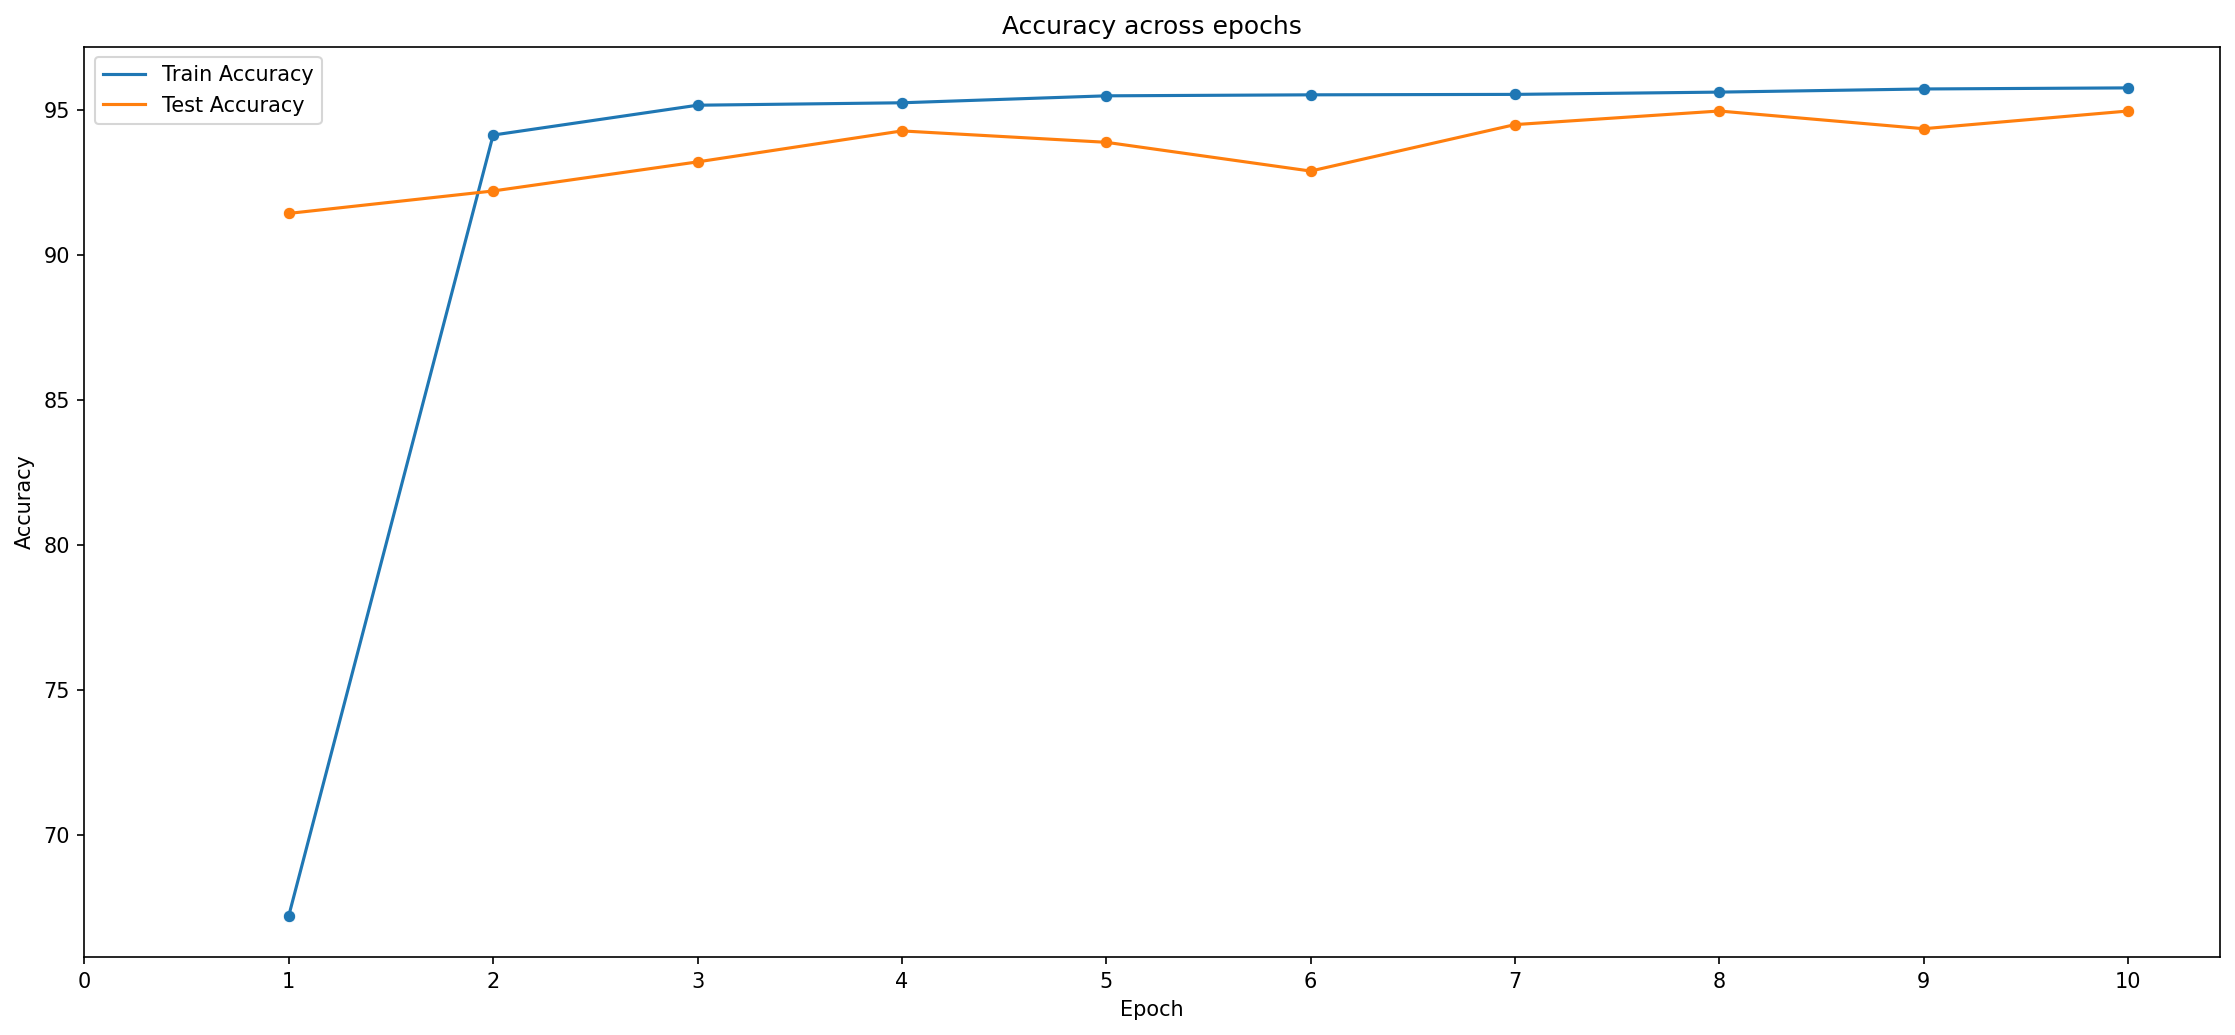

In [82]:
plt.figure(figsize=(15,7),dpi = 150)
sns.lineplot(x = range(1,len(model_1_results['train_acc'])+1), y = [x*100 for x in model_1_results['train_acc']],
             label = 'Train Accuracy',palette=pastel[0])
sns.lineplot(x = range(1,len(model_1_results['test_acc'])+1), y = [x*100 for x in model_1_results['test_acc']],
             label = 'Test Accuracy',palette=pastel[1])
sns.scatterplot(x = range(1,len(model_1_results['train_acc'])+1), y = [x*100 for x in model_1_results['train_acc']])
sns.scatterplot(x = range(1,len(model_1_results['test_acc'])+1), y = [x*100 for x in model_1_results['test_acc']])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([_ for _ in range(11)])
plt.title('Accuracy across epochs')
plt.tight_layout()
#plt.savefig('_plots/accuracy_epochs_1.jpeg')
plt.show()

In [83]:
#Saving the model
#torch.save(model_0,'_models/model_1.pth')

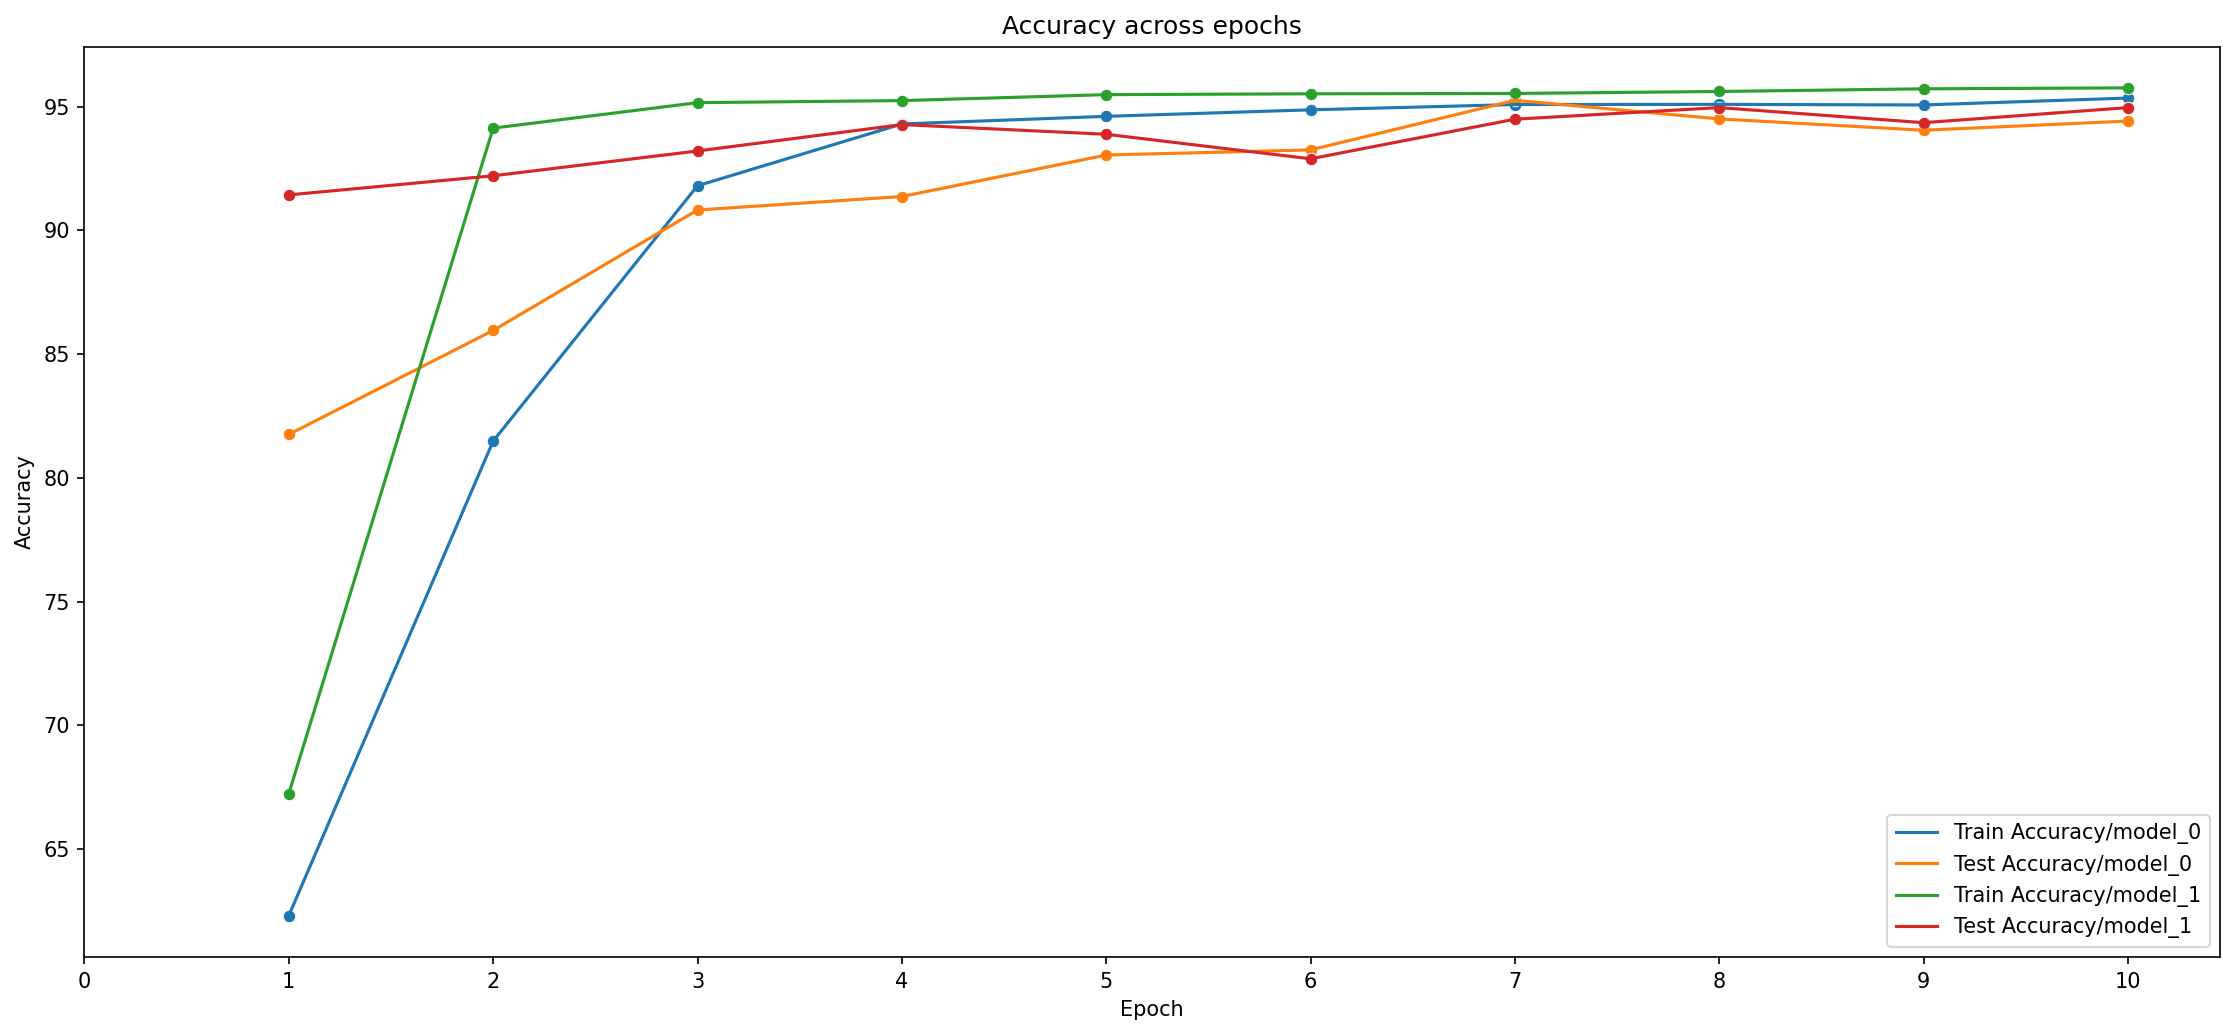

In [84]:
plt.figure(figsize=(15,7),dpi = 150)
sns.lineplot(x = range(1,len(model_0_results['train_acc'])+1), y = [x*100 for x in model_0_results['train_acc']],
             label = 'Train Accuracy/model_0',palette=pastel[0])
sns.lineplot(x = range(1,len(model_0_results['test_acc'])+1), y = [x*100 for x in model_0_results['test_acc']],
             label = 'Test Accuracy/model_0',palette=pastel[1])
sns.scatterplot(x = range(1,len(model_0_results['train_acc'])+1), y = [x*100 for x in model_0_results['train_acc']])
sns.scatterplot(x = range(1,len(model_0_results['test_acc'])+1), y = [x*100 for x in model_0_results['test_acc']])
sns.lineplot(x = range(1,len(model_1_results['train_acc'])+1), y = [x*100 for x in model_1_results['train_acc']],
             label = 'Train Accuracy/model_1',palette=pastel[0])
sns.lineplot(x = range(1,len(model_1_results['test_acc'])+1), y = [x*100 for x in model_1_results['test_acc']],
             label = 'Test Accuracy/model_1',palette=pastel[1])
sns.scatterplot(x = range(1,len(model_1_results['train_acc'])+1), y = [x*100 for x in model_1_results['train_acc']])
sns.scatterplot(x = range(1,len(model_1_results['test_acc'])+1), y = [x*100 for x in model_1_results['test_acc']])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([_ for _ in range(11)])
plt.title('Accuracy across epochs')
plt.tight_layout()
#plt.savefig('_plots/accuracy_epochs.jpeg')
plt.show()

# Conclusion:

Initially, without any transformations and with the default learning rate, the model's accuracy was only 52.4%, which is essentially equivalent to randomly guessing. However, after conducting hyperparameter tuning, and specifically by choosing to use the original color gradient, the model's accuracy significantly improved from 94.57% to an impressive 94.97%.

In [85]:
from sklearn.metrics import f1_score

In [110]:
print(f"The f_score for model_1 is : {f1_score(labels,pred)}")
print("Higher the F1_score better the model")

The f_score for model_1 is : 1.0
Higher the F1_score better the model


In [111]:
def sensitivity(true_positives, false_negatives):
    """
    Calculate sensitivity (recall or true positive rate).

    Args:
        true_positives (int): 
        false_negatives (int):

    Returns:
        float: Sensitivity score.
    """
    sensitivity = true_positives / (true_positives + false_negatives)
    return sensitivity


In [112]:
class classification_metrics:
    
    def __init__(self,labels,prediction):
        
        self.accuracy = accuracy_score(labels,prediction)
        self.true_negatives = confusion_matrix(labels,prediction)[0][0]
        self.true_positives = confusion_matrix(labels,prediction)[1][1]
        self.false_negatives = confusion_matrix(labels,prediction)[1][0]
        self.false_positives = confusion_matrix(labels,prediction)[0][1]
        
    def sensitivity(self):
        
        return self.true_positives/(self.true_positives+self.false_negatives)

In [113]:
model_1_metrics = classification_metrics(labels,pred)

In [115]:
model_1_metrics.sensitivity()

1.0

In [116]:
print(f"The sensitivity for model_1 is : {model_1_metrics.sensitivity()}")
print("Higher the sensitivity better the model")

The sensitivity for model_1 is : 1.0
Higher the sensitivity better the model


# In the medical scenario,

It is crucial to focus on minimizing false negatives. Accuracy, as a standalone metric, may not be the most appropriate measure of model performance in such cases.

False negatives occur when the model incorrectly predicts a negative outcome for a positive sample. In medical applications, false negatives can be particularly dangerous as they may lead to missing critical diagnoses or failing to identify patients who require urgent medical attention. For example, a false negative in cancer diagnosis may delay treatment and potentially worsen a patient's condition.

To address this concern, we should place more emphasis on other performance metrics that specifically account for false negatives. One such metric is sensitivity, also known as recall or true positive rate. Sensitivity measures the proportion of positive cases correctly identified by the model out of all actual positive cases. A high sensitivity indicates that the model is effective at reducing false negatives and capturing as many positive cases as possible.

Additionally, the F1 score is a commonly used metric in medical scenarios. It is the harmonic mean of precision and sensitivity (recall) and provides a balanced evaluation of the model's performance. The F1 score takes into account both false positives and false negatives and is especially useful when classes are imbalanced, which is often the case in medical datasets.

In summary, in the medical field, we should prioritize metrics that consider the consequences of false negatives, such as sensitivity and the F1 score. While accuracy is a valuable metric in some contexts, it may not provide a comprehensive evaluation of model performance when the focus is on reducing false negatives and ensuring better detection of positive cases in critical medical applications.